In [1]:
#Analisi Diffusione COVID-19 
#Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da
#Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " ! 1. Download our complete COVID-19 dataset
#" scaricare il dataset nel formato che si preferisce. 
# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati 
# 2. Si chiede di trovare, per ogni continente:
#a.il numero di casi fin dall'inizio della pandemia
#b. la percentuale rispetto al totale mondiale del numero di casi.
#3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno
#misurazioni; quindi mostrare con dei grafici adeguati:
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
#b. il numero di nuovi casi rispetto alla data.
#4. Riguardo le nazioni di Italia, Germania e Francia:
# a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare
#quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante.
#5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
#a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients) 
#b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv    (Ho usato questo link per scaricare il dataset.)
df = pd.read_csv("DATASET_COVID_19.csv")
df

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [4]:
#Si richiede di verificare le dimensioni del dataset e i relativi metadati.
pd.concat([df.head(), df.tail()])                     # Uso head e tail per visionare le prime e ultime 5 righe del dataset.

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547059,Zimbabwe,2025-11-16,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [5]:
df.duplicated().sum()                                     #Controllo se ci sono duplicati.

0

In [6]:
df.describe()                              #Uso describe per visionare le statistiche numeriche.

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,5.338560e+05,5.303080e+05,5.290990e+05,533856.000000,530308.000000,529099.000000,5.338560e+05,531235.000000,530023.000000,533856.000000,...,5.296120e+05,521031.000000,523180.000000,525324.000000,427346.000000,350691.000000,461695.000000,248104.000000,330975.000000,0.0
mean,1.437181e+07,1.025189e+04,1.027536e+04,132365.473829,96.117491,96.340884,1.560401e+05,97.938788,98.164868,933.350731,...,1.316652e+08,378.207027,31.167570,73.446812,22490.131588,14.029640,9.060532,59.247941,3.181416,NaN
std,7.442564e+07,1.157179e+05,9.882474e+04,176083.711895,965.725633,497.568729,7.803317e+05,793.172509,730.562992,1186.123100,...,6.689633e+08,1720.800694,9.665285,7.656692,22538.867173,20.825215,5.236865,31.878619,2.566310,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,5.130000e+02,0.136470,14.298000,18.817699,708.178284,0.000000,1.100000,3.440189,0.300000,NaN
25%,9.515000e+03,0.000000e+00,0.000000e+00,3032.735400,0.000000,0.000000,7.400000e+01,0.000000,0.000000,44.103690,...,4.553740e+05,36.265862,22.243999,68.748703,5155.620117,0.452137,5.600000,26.200474,1.320000,NaN
50%,8.847300e+04,0.000000e+00,4.000000e+00,50682.260000,0.000000,0.703198,1.024000e+03,0.000000,0.000000,402.215200,...,6.035104e+06,92.084663,31.683001,74.695999,14572.607422,2.718295,7.400000,70.153603,2.600000,NaN
75%,1.084295e+06,5.300000e+01,1.798571e+02,196518.080000,6.125418,29.360855,1.270700e+04,0.000000,1.714286,1464.534050,...,2.971544e+07,237.470367,39.080002,78.768799,34663.496094,21.365259,11.100000,88.469353,4.260000,NaN
max,7.788527e+08,8.401906e+06,6.402033e+06,769806.800000,230762.550000,37463.746000,7.102566e+06,57167.000000,14820.714000,6603.648000,...,8.021407e+09,21344.242188,59.875000,85.746399,117746.992188,85.317673,30.799999,100.000000,13.800000,NaN


In [7]:
df.info()                   #Informazioni generali del dataset con relativo tipo di dato.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547060 entries, 0 to 547059
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     547060 non-null  object 
 1   date                                        547060 non-null  object 
 2   total_cases                                 533856 non-null  float64
 3   new_cases                                   530308 non-null  float64
 4   new_cases_smoothed                          529099 non-null  float64
 5   total_cases_per_million                     533856 non-null  float64
 6   new_cases_per_million                       530308 non-null  float64
 7   new_cases_smoothed_per_million              529099 non-null  float64
 8   total_deaths                                533856 non-null  float64
 9   new_deaths                                  531235 non-null  float64
 

In [8]:
df.isna().sum()                     #Uso isna per controllare in ogni colonna i valori nulli.

country                            0
date                               0
total_cases                    13204
new_cases                      16752
new_cases_smoothed             17961
                               ...  
extreme_poverty               196369
diabetes_prevalence            85365
handwashing_facilities        298956
hospital_beds_per_thousand    216085
human_development_index       547060
Length: 61, dtype: int64

In [9]:
df["continent"].isna().sum()                     #Controllo nello specifico la colonna continent quanti nulli ci sono.

40960

In [10]:
#2. Si chiede di trovare, per ogni continente: 
#a. il numero di casi fin dall'inizio della pandemia
df_valido = df[df["continent"].notna() & df["total_cases"].notna()]
display(df_valido)                                     #Uso .notna per eliminare le righe dove non è presente il dato in entrambe le colonne.


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
5,Afghanistan,2020-01-06,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
6,Afghanistan,2020-01-07,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
7,Afghanistan,2020-01-08,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [11]:
df_valido["continent"].isna().sum()
df_valido["total_cases"].isna().sum()                #Controllo che siano state eliminate le righe senza dato. 

0

In [12]:
ultima_riga_per_paese = df_valido.groupby("country").last()
display(ultima_riga_per_paese.head(5))   
#Mostro le prime 5 righe del DataFrame 'ultima_riga_per_paese',che contiene l'ultima riga valida di ciascun paese con i 
#casi totali cumulativi. Questo mi permette di verificare che ogni paese abbia un totale di casi aggiornato fino all'ultima data disponibile.


,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2025-11-16,235214.0,0.0,0.0,5796.4683,0.0,0.0,7998.0,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.900000,48.214695,0.39,NaN
Albania,2025-11-16,337215.0,0.0,0.0,119257.7900,0.0,0.0,3608.0,0.0,0.0,...,2827614.0,103.197594,35.943001,78.768799,15492.067383,0.340922,10.200000,NaN,2.89,NaN
Algeria,2025-11-16,272421.0,0.0,0.0,5990.2515,0.0,0.0,6881.0,0.0,0.0,...,45477391.0,19.094181,27.983000,76.128899,11198.233398,0.000000,7.100000,84.804100,1.90,NaN
American Samoa,2025-11-16,8359.0,0.0,0.0,172831.6000,0.0,0.0,34.0,0.0,0.0,...,48365.0,241.824997,27.927000,72.752098,NaN,NaN,20.299999,NaN,NaN,NaN
Andorra,2025-11-16,48015.0,0.0,0.0,602280.4400,0.0,0.0,159.0,0.0,0.0,...,79722.0,169.621277,42.832001,84.016403,NaN,NaN,9.700000,NaN,NaN,NaN


In [13]:
totale_casi_per_continente = ultima_riga_per_paese.groupby("continent")["total_cases"].sum()
print(totale_casi_per_continente)     
#Sommo i casi totali cumulativi di tutti i paesi raggruppati per continente.
#In questo modo ottengo il totale dei casi per ciascun continente fino all'ultima data disponibile.


continent
Africa            13063504.0
Asia             302173617.0
Europe           254816240.0
North America    124516750.0
Oceania           15032781.0
South America     69249767.0
Name: total_cases, dtype: float64


In [14]:
#b. la percentuale rispetto al totale mondiale del numero di casi.
totale_mondiale = totale_casi_per_continente.sum()
print("Totale mondiale" , totale_mondiale)
percentuale_mondiale = (totale_casi_per_continente / totale_mondiale * 100)
print(percentuale_mondiale.round(2))                                
#Mi calcolo il totale globale e lo  uso per calcolare la percentuale per ogni continente e arrotondo il risultato per una maggiore leggibilità. 

Totale mondiale 778852659.0
continent
Africa            1.68
Asia             38.80
Europe           32.72
North America    15.99
Oceania           1.93
South America     8.89
Name: total_cases, dtype: float64


In [15]:
#3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno
#misurazioni; quindi mostrare con dei grafici adeguati:
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
df["date"] = pd.to_datetime(df["date"])
df_italia_2022 = df[(df["country"] == "Italy") & (df["date"].dt.year == 2022)]
display(df_italia_2022)
#Seleziono i dati relativi all'Italia per l'anno 2022, converto la colonna 'date' in formato datetime per poter filtrare l'anno ed infine mostro le
#righe relative all'Italia.


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
235100,Italy,2022-01-01,6125683.0,144255.0,79719.860,102746.98,2419.61040,1337.1528,137402.0,155.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235101,Italy,2022-01-02,6267035.0,141352.0,92086.290,105117.90,2370.91770,1544.5768,137513.0,111.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235102,Italy,2022-01-03,6328076.0,61041.0,97251.860,106141.74,1023.84960,1631.2196,137646.0,133.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235103,Italy,2022-01-04,6396110.0,68034.0,102571.140,107282.89,1141.14430,1720.4408,137786.0,140.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235104,Italy,2022-01-05,6566947.0,170837.0,115790.710,110148.37,2865.47400,1942.1746,138045.0,259.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235460,Italy,2022-12-27,25081005.0,4528.0,18302.572,420687.38,75.94881,306.9917,184248.0,36.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235461,Italy,2022-12-28,25089327.0,8322.0,15423.571,420826.97,139.58612,258.7018,184324.0,76.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235462,Italy,2022-12-29,25119088.0,29761.0,16720.857,421326.16,499.18560,280.4614,184528.0,204.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235463,Italy,2022-12-30,25143705.0,24617.0,17442.715,421739.06,412.90454,292.5692,184642.0,114.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN


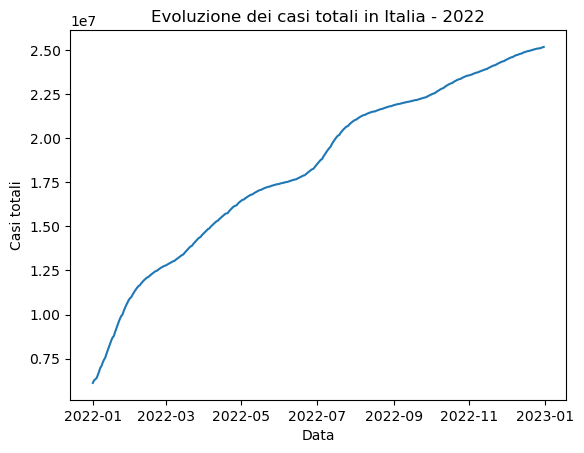

In [16]:
sns.lineplot(x="date", y="total_cases", data = df_italia_2022)
plt.title("Evoluzione dei casi totali in Italia - 2022")
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.show()


In [17]:
#b. il numero di nuovi casi rispetto alla data.
df_italia_2022 = df[(df["country"] == "Italy") & (df["date"].dt.year == 2022)].copy()
df_italia_2022["anno"] = df_italia_2022["date"].dt.year
df_italia_2022["mese"] = df_italia_2022["date"].dt.month
casi_mensili = df_italia_2022.groupby(["anno", "mese"])["new_cases"].sum()
print(casi_mensili)
#Filtro i dati relativi all’Italia per l’anno 2022 e creo una copia del DataFrame per evitare warning quando aggiungo nuove colonne. 
#Aggiungo le colonne 'anno' e 'mese' ricavate dalla data per poter raggruppare i nuovi casi mensili.


anno  mese
2022  1       4944057.0
      2       1839073.0
      3       1803432.0
      4       1841193.0
      5        987540.0
      6       1042154.0
      7       2563896.0
      8        843170.0
      9        586860.0
      10      1116720.0
      11       864983.0
      12       753932.0
Name: new_cases, dtype: float64


In [18]:
#4. Riguardo le nazioni di Italia, Germania e Francia:
# a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare
#quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)
df_boxplot = df[
    (df["country"].isin(["Italy", "Germany", "France"])) &
    (df["date"] >= "2022-05-01") &
    (df["date"] <= "2023-04-30")
]
print(df_boxplot.shape)
display(df_boxplot.head())
#Selezioniamo i dati di Italia, Germania e Francia da maggio 2022 ad aprile 2023 e controllo le prime righe e la dimensione del DataFrame.


(1095, 61)


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
166926,France,2022-05-01,27742592.0,376510.0,53787.145,431607.16,5857.5786,836.79694,146744.0,867.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166927,France,2022-05-02,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166928,France,2022-05-03,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166929,France,2022-05-04,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166930,France,2022-05-05,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN


<Axes: xlabel='country', ylabel='icu_patients'>

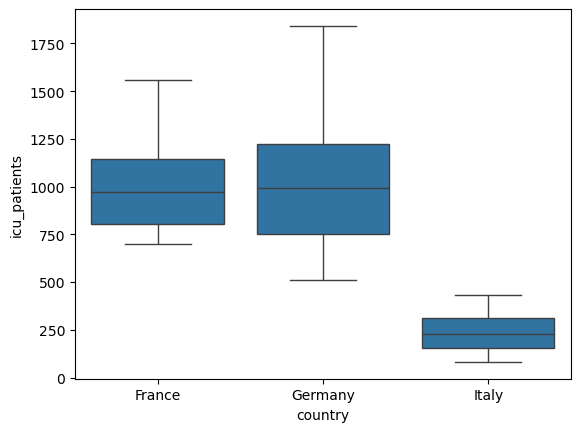

In [19]:
sns.boxplot(data=df_boxplot, x="country", y="icu_patients")

In [20]:
#b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante.

#Il boxplot confronta il numero di pazienti in terapia intensiva (ICU) in Italia, Francia e Germania tra maggio 2022 e aprile 2023.
#Dalla distribuzione dei valori si osserva che la Germania e la Francia hanno avuto un carico maggiore sulle terapie intensive rispetto all’Italia, 
#i loro box sono più alti e le mediane si trovano a valori superiori, indicando un numero tipicamente più elevato di pazienti, in particolare,
#la mediana della Germania risulta la più elevata.L’Italia, invece, presenta un box più basso, con valori mediani intorno ai 250 pazienti, 
#indicando un impatto decisamente minore sulle ICU rispetto agli altri due paesi.

In [21]:
#5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
#a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
df_quattro_paesi_2021 = df[
    (df["country"].isin(["Italy", "Germany", "France", "Spain"])) &
    (df["date"].dt.year == 2021)
]
df_quattro_paesi_2021["hosp_patients"].isna().sum() 
#Creo un nuovo DataFrame filtrando per i 4 paesi e per l'anno 2021 poi verifico se ci sono valori nulli nella colonna 'hosp_patients'.

365

In [22]:
df_quattro_paesi_2021 = df_quattro_paesi_2021[df_quattro_paesi_2021["hosp_patients"].notna()]
display(df_quattro_paesi_2021)  
# Elimino le righe senza valori nella colonna 'hosp_patients' per lavorare solo con dati disponibili.

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
166441,France,2021-01-01,2338258.0,0.0,11984.000,36377.600,0.0000,186.44185,63534.0,0.0,...,66277412.0,121.042030,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166442,France,2021-01-02,2338258.0,0.0,11984.000,36377.600,0.0000,186.44185,63534.0,0.0,...,66277412.0,121.042030,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166443,France,2021-01-03,2427206.0,88948.0,12706.857,37761.414,1383.8143,197.68776,66449.0,2915.0,...,66277412.0,121.042030,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166444,France,2021-01-04,2427206.0,0.0,12706.857,37761.414,0.0000,197.68776,66449.0,0.0,...,66277412.0,121.042030,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166445,France,2021-01-05,2427206.0,0.0,12706.857,37761.414,0.0000,197.68776,66449.0,0.0,...,66277412.0,121.042030,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458341,Spain,2021-12-27,6100138.0,0.0,70149.430,127542.210,0.0000,1466.69030,91275.0,0.0,...,47828386.0,95.707832,44.391998,82.366096,40223.011719,0.813408,10.3,NaN,2.97,NaN
458342,Spain,2021-12-28,6100138.0,0.0,70149.430,127542.210,0.0000,1466.69030,91275.0,0.0,...,47828386.0,95.707832,44.391998,82.366096,40223.011719,0.813408,10.3,NaN,2.97,NaN
458343,Spain,2021-12-29,6100138.0,0.0,70149.430,127542.210,0.0000,1466.69030,91275.0,0.0,...,47828386.0,95.707832,44.391998,82.366096,40223.011719,0.813408,10.3,NaN,2.97,NaN
458344,Spain,2021-12-30,6100138.0,0.0,70149.430,127542.210,0.0000,1466.69030,91275.0,0.0,...,47828386.0,95.707832,44.391998,82.366096,40223.011719,0.813408,10.3,NaN,2.97,NaN


In [23]:
df_quattro_paesi_2021["hosp_patients"].isna().sum()  #Controllo che le righe vengano eliminate.

0

In [24]:
somma_hosp_per_paese = df_quattro_paesi_2021.groupby("country")["hosp_patients"].sum()
print(somma_hosp_per_paese) 
#L'output sottostante mostra la somma totale dei pazienti ospedalizzati per COVID-19 nel 2021 per i quattro paesi selezionati (Italia, Francia,
#Germania e Spagna). Si nota che per la Germania non ci sono dati disponibili, mentre la Francia registra il maggior numero di ricoveri, seguita da
#Italia e Spagna.


country
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64


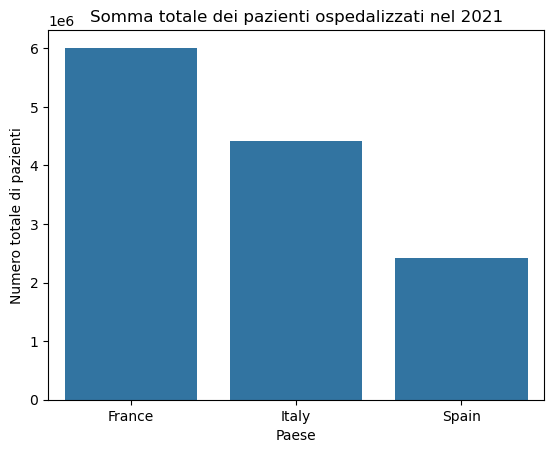

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=somma_hosp_per_paese.index, y=somma_hosp_per_paese.values)
plt.title("Somma totale dei pazienti ospedalizzati nel 2021")
plt.xlabel("Paese")
plt.ylabel("Numero totale di pazienti")
plt.show()


In [26]:
#b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.
df_germania = df[(df["country"] == "Germany") & (df["date"].dt.year == 2021)]
print(df_germania["hosp_patients"].notna().sum(), "/", df_germania.shape[0])

#Per avere certezza che non ci fossero dati per la Germania, ho controllato solo questo paese nell'anno 2021. In effetti, i dati non sono presenti. 
#Poiché non ci sono valori registrati, non è possibile sostituirli con medie o altri metodi, perché ciò introdurrebbe valori non attendibili e 
#non veritieri.


0 / 365
